In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
train = pd.read_csv('train.csv', index_col='id')
train.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
train.shape

(20800, 4)

In [14]:
train.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [15]:
train = train.fillna(' ')
train['total'] = train['title'] + ' ' + train['author'] + train['text']
train.head()

,title,author,text,label,total
id,,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [16]:
train.isnull().sum()

title     0
author    0
text      0
label     0
total     0
dtype: int64

In [17]:
df = train.drop(['title', 'author', 'total'], axis=1)
df.head()

,text,label
id,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your file path or data source)
# For example:
# df = pd.read_csv("data.csv")
# Replace `target_column` with the name of your target column

def check_balance(df, label):
    # Count the number of samples for each class
    class_counts = df[label].value_counts()

    print("Class Distribution:")
    print(class_counts)

    # Plot the distribution for visualization
    plt.figure(figsize=(8, 6))
    class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=0)
    plt.show()

    # Calculate imbalance ratio
    max_count = class_counts.max()
    min_count = class_counts.min()

    imbalance_ratio = min_count / max_count
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

    # Determine if the dataset is balanced
    threshold = 0.5  # Customize as per your requirement
    if imbalance_ratio >= threshold:
        print("The dataset is balanced.")
    else:
        print("The dataset is imbalanced.")


Class Distribution:
label
1    10413
0    10387
Name: count, dtype: int64


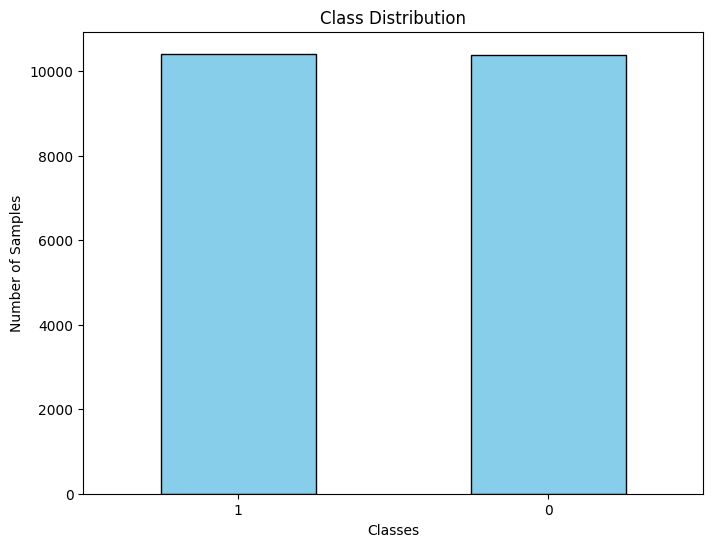

Imbalance Ratio: 1.00
The dataset is balanced.


In [19]:
# Call the function with your DataFrame and target column
check_balance(df, 'label')


In [20]:
import re
import string

def wordopt(text):
    text = str(text)  # Ensure the input is a string
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\[.*?\]", "", text)  # Remove text inside square brackets
    text = re.sub(r"\\W", " ", text)  # Replace non-word characters with a space
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing digits
    return text


In [21]:
df['text'] = df['text'].apply(wordopt)

In [22]:
df.head()

,text,label
id,,
0,house dem aide we didn’t even see comey’s lett...,1
1,ever get the feeling your life circles the rou...,0
2,why the truth might get you fired october th...,1
3,videos civilians killed in single us airstrik...,1
4,print an iranian woman has been sentenced to s...,1


In [23]:
X = df['text']
y = df['label']

In [24]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
def stratified_split(df, label, test_size=0.3, random_state=42):

    # Perform stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    print("Training set class distribution:")
    print(y_train.value_counts())
    print("\nTesting set class distribution:")
    print(y_test.value_counts())

    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = stratified_split(df, 'label')

Training set class distribution:
label
1    7289
0    7271
Name: count, dtype: int64

Testing set class distribution:
label
1    3124
0    3116
Name: count, dtype: int64


In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14560,)
(6240,)
(14560,)
(6240,)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [3]:
def load_glove_embeddings(filepath):
    embeddings_index = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

def get_document_vectors(data, embeddings_index, embedding_dim=50):
    document_vectors = []
    for doc in data:
        words = doc.split()  # Tokenize text
        word_vectors = [embeddings_index[word] for word in words if word in embeddings_index]
        if word_vectors:  # If the document has words with embeddings
            document_vector = np.mean(word_vectors, axis=0)  # Average word vectors
        else:  # Handle empty documents
            document_vector = np.zeros(embedding_dim)
        document_vectors.append(document_vector)
    return np.array(document_vectors)

# Example usage
glove_filepath = 'path/to/glove.6B.50d.txt'  # Replace with your GloVe file path
embedding_dim = 50  # Set embedding dimension to match GloVe

# Load embeddings
embeddings_index = load_glove_embeddings(glove_filepath)

# Transform train and test data
X_train_vectors = get_document_vectors(X_train, embeddings_index, embedding_dim)
X_test_vectors = get_document_vectors(X_test, embeddings_index, embedding_dim)


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/glove.6B.50d.txt'

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
MNB = MultinomialNB() 
MNB.fit(tfidf_train, y_train)
pred = MNB.predict(tfidf_test)
from sklearn.metrics import confusion_matrix
MNBcm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(MNBcm)
from sklearn.metrics import accuracy_score
MNBscore = accuracy_score(y_test, pred)
print("Accuracy: {:.3f}%".format(MNBscore * 100))
sensitivity_mnb = recall_score(y_test, pred, pos_label=0) 
print("Sensitivity (Recall): {:.3f}%".format(sensitivity_mnb * 100))
specificity_mnb = MNBcm[0, 0] / (MNBcm[0, 0] + MNBcm[0, 1])  # TN / (TN + FP)
print("Specificity: {:.3f}%".format(specificity_mnb * 100))
from sklearn.metrics import f1_score
f1_mnb = f1_score(y_test, pred)
print("F1 Score: {:.3f}%".format(f1_mnb * 100))

Confusion Matrix:
[[3096   20]
 [ 936 2188]]
Accuracy: 84.679%
Sensitivity (Recall): 99.358%
Specificity: 99.358%
F1 Score: 82.071%


In [30]:
# Transform the data to ensure non-negative values
hashing_train_non_negative = np.abs(hashing_train)
hashing_test_non_negative = np.abs(hashing_test)

MNB_h = MultinomialNB()
MNB_h.fit(hashing_train_non_negative, y_train)
pred = MNB_h.predict(hashing_test_non_negative)
MNBcm_h = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(MNBcm_h)
MNBscore_h = accuracy_score(y_test, pred)
print("Accuracy: {:.3f}%".format(MNBscore_h * 100))
sensitivity_mnb_h = recall_score(y_test, pred, pos_label=0)
print("Sensitivity (Recall): {:.3f}%".format(sensitivity_mnb_h * 100))
specificity_mnb_h = MNBcm_h[0, 0] / (MNBcm_h[0, 0] + MNBcm_h[0, 1])
print("Specificity: {:.3f}%".format(specificity_mnb_h * 100))
f1_mnb_h = f1_score(y_test, pred)
print("F1 Score: {:.3f}%".format(f1_mnb_h * 100))


Confusion Matrix:
[[3094   22]
 [1052 2072]]
Accuracy: 82.788%
Sensitivity (Recall): 99.294%
Specificity: 99.294%
F1 Score: 79.417%


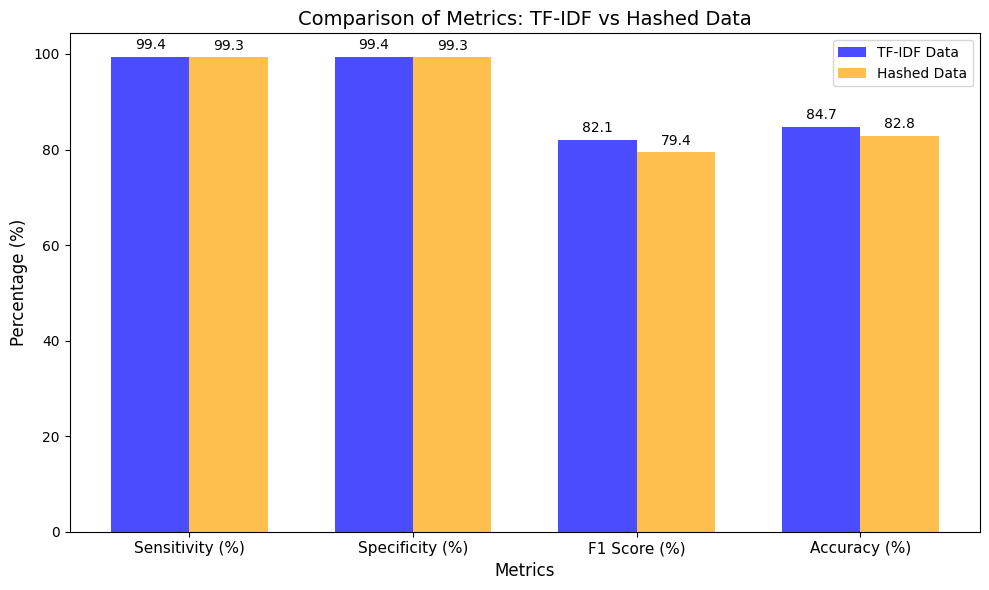

In [31]:
import numpy as np
import matplotlib.pyplot as plt

metrics_tfidf = [sensitivity_mnb, specificity_mnb, f1_mnb, MNBscore]
metrics_hashing = [sensitivity_mnb_h, specificity_mnb_h, f1_mnb_h, MNBscore_h]
metric_labels = ['Sensitivity (%)', 'Specificity (%)', 'F1 Score (%)', 'Accuracy (%)']
metrics_tfidf = [metric * 100 for metric in metrics_tfidf]
metrics_hashing = [metric * 100 for metric in metrics_hashing]
x = np.arange(len(metric_labels))  # X-axis positions
width = 0.35  # Width of bars

# Create bar plots
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, metrics_tfidf, width, label='TF-IDF Data', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, metrics_hashing, width, label='Hashed Data', color='orange', alpha=0.7)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Comparison of Metrics: TF-IDF vs Hashed Data', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metric_labels, fontsize=11)
ax.legend()

# Display bar values on top
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

add_bar_labels(bars1)
add_bar_labels(bars2)

# Show plot
plt.tight_layout()
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(tfidf_train, y_train )
pred = LR.predict(tfidf_test)
LRcm = confusion_matrix(y_test, pred)
print(LRcm)
LRscore = accuracy_score(y_test, pred)
print("Accuracy: {:.3f}%".format(LRscore * 100))
sensitivity_lr = recall_score(y_test, pred, pos_label=0)  
print("Sensitivity (Recall): {:.3f}%".format(sensitivity_lr * 100))
specificity_lr = LRcm[0, 0] / (LRcm[0, 0] + LRcm[0, 1])  # TN / (TN + FP)
print("Specificity: {:.3f}%".format(specificity_lr * 100))
f1_lr = f1_score(y_test, pred)
print("F1 Score: {:.3f}%".format(f1_lr * 100))


[[2884  232]
 [ 162 2962]]
Accuracy: 93.686%
Sensitivity (Recall): 92.555%
Specificity: 92.555%
F1 Score: 93.764%


In [33]:
LR_h = LogisticRegression(random_state=0)
LR_h.fit(hashing_train, y_train)
pred = LR_h.predict(hashing_test)
LRcm_h = confusion_matrix(y_test, pred)
print("Confusion Matrix (Logistic Regression):")
print(LRcm_h)
LRscore_h = accuracy_score(y_test, pred)
print("Accuracy: {:.3f}%".format(LRscore_h * 100))
sensitivity_lr_h = recall_score(y_test, pred, pos_label=0)  # Adjust pos_label as per your dataset
print("Sensitivity (Recall): {:.3f}%".format(sensitivity_lr_h * 100))
specificity_lr_h = LRcm_h[0, 0] / (LRcm_h[0, 0] + LRcm_h[0, 1])  # Adjust index if needed
print("Specificity: {:.3f}%".format(specificity_lr_h * 100))
f1_lr_h = f1_score(y_test, pred)
print("F1 Score: {:.3f}%".format(f1_lr_h * 100))


Confusion Matrix (Logistic Regression):
[[2855  261]
 [ 183 2941]]
Accuracy: 92.885%
Sensitivity (Recall): 91.624%
Specificity: 91.624%
F1 Score: 92.981%


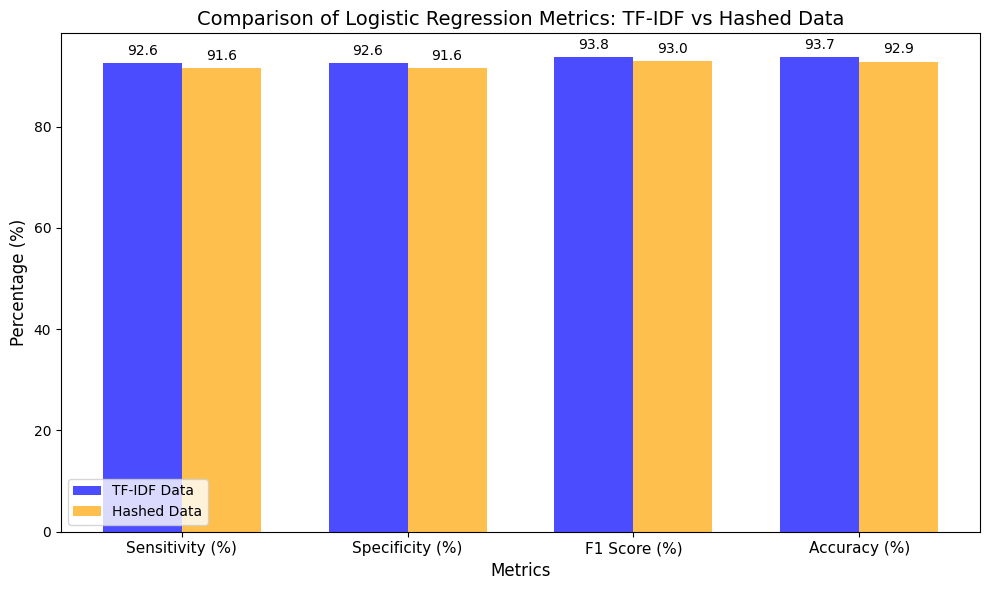

In [34]:

metrics_tfidf_lr = [sensitivity_lr, specificity_lr, f1_lr, LRscore]
metrics_hashing_lr = [sensitivity_lr_h, specificity_lr_h, f1_lr_h, LRscore_h]
metric_labels = ['Sensitivity (%)', 'Specificity (%)', 'F1 Score (%)', 'Accuracy (%)']
metrics_tfidf_lr = [metric * 100 for metric in metrics_tfidf_lr]
metrics_hashing_lr = [metric * 100 for metric in metrics_hashing_lr]
x = np.arange(len(metric_labels))  # X-axis positions
width = 0.35  # Width of bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, metrics_tfidf_lr, width, label='TF-IDF Data', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, metrics_hashing_lr, width, label='Hashed Data', color='orange', alpha=0.7)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Comparison of Logistic Regression Metrics: TF-IDF vs Hashed Data', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metric_labels, fontsize=11)
ax.legend()
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=10)
add_bar_labels(bars1)
add_bar_labels(bars2)
plt.tight_layout()
plt.show()


In [35]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1000)
KNN.fit(tfidf_train, y_train)
pred = KNN.predict(tfidf_test)
KNNcm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(KNNcm)
KNNscore = accuracy_score(y_test, pred)
print("Accuracy: {:.3f}%".format(KNNscore * 100))
sensitivity_knn = recall_score(y_test, pred, pos_label=0)  
print("Sensitivity (Recall): {:.3f}%".format(sensitivity_knn * 100))
specificity_knn = KNNcm[0, 0] / (KNNcm[0, 0] + KNNcm[0, 1])  # TN / (TN + FP)
print("Specificity: {:.3f}%".format(specificity_knn * 100))
f1_knn = f1_score(y_test, pred)
print("F1 Score: {:.3f}%".format(f1_knn * 100))

Confusion Matrix:
[[2876  240]
 [ 618 2506]]
Accuracy: 86.250%
Sensitivity (Recall): 92.298%
Specificity: 92.298%
F1 Score: 85.383%


In [36]:
KNN_h = KNeighborsClassifier()
KNN_h.fit(hashing_train, y_train)
pred = KNN_h.predict(hashing_test)
KNNcm_h = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(KNNcm_h)
KNNscore_h = accuracy_score(y_test, pred)
print("Accuracy: {:.3f}%".format(KNNscore_h * 100))
sensitivity_knn_h = recall_score(y_test, pred, pos_label=0)
print("Sensitivity (Recall): {:.3f}%".format(sensitivity_knn_h * 100))
specificity_knn_h = KNNcm_h[0, 0] / (KNNcm_h[0, 0] + KNNcm_h[0, 1])
print("Specificity: {:.3f}%".format(specificity_knn_h * 100))
f1_knn_h = f1_score(y_test,pred)
print("F1 Score: {:.3f}%".format(f1_knn_h * 100))


Confusion Matrix:
[[ 772 2344]
 [  30 3094]]
Accuracy: 61.955%
Sensitivity (Recall): 24.775%
Specificity: 24.775%
F1 Score: 72.273%


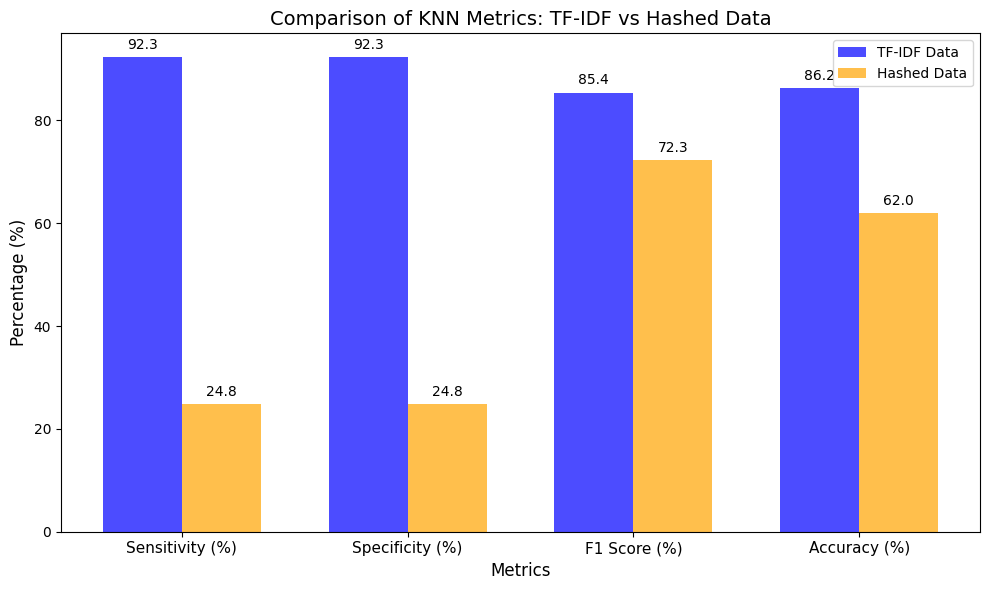

In [37]:
import matplotlib.pyplot as plt
import numpy as np

metrics_tfidf_knn = [sensitivity_knn, specificity_knn, f1_knn, KNNscore]
metrics_hashing_knn = [sensitivity_knn_h, specificity_knn_h, f1_knn_h, KNNscore_h]
metric_labels = ['Sensitivity (%)', 'Specificity (%)', 'F1 Score (%)', 'Accuracy (%)']

metrics_tfidf_knn = [metric * 100 for metric in metrics_tfidf_knn]
metrics_hashing_knn = [metric * 100 for metric in metrics_hashing_knn]

x = np.arange(len(metric_labels))  # X-axis positions
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, metrics_tfidf_knn, width, label='TF-IDF Data', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, metrics_hashing_knn, width, label='Hashed Data', color='orange', alpha=0.7)

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Comparison of KNN Metrics: TF-IDF vs Hashed Data', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metric_labels, fontsize=11)
ax.legend()

def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

add_bar_labels(bars1)
add_bar_labels(bars2)

plt.tight_layout()
plt.show()


In [38]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(tfidf_train, y_train)
y_pred_dt = decision_tree.predict(tfidf_test)
DTcm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(DTcm)
DTscore = accuracy_score(y_test, y_pred_dt)
print("Accuracy: {:.3f}%".format(DTscore * 100))
sensitivity_dt = recall_score(y_test, y_pred_dt, pos_label=0)
print("Sensitivity (Recall): {:.3f}%".format(sensitivity_dt * 100))
specificity_dt = DTcm[0, 0] / (DTcm[0, 0] + DTcm[0, 1])  # TN / (TN + FP)
print("Specificity: {:.3f}%".format(specificity_dt * 100))
f1_dt = f1_score(y_test, y_pred_dt)
print("F1 Score: {:.3f}%".format(f1_dt * 100))

Confusion Matrix:
[[2715  401]
 [ 324 2800]]
Accuracy: 88.381%
Sensitivity (Recall): 87.131%
Specificity: 87.131%
F1 Score: 88.538%


In [39]:
decision_tree_h = DecisionTreeClassifier(random_state=42)
decision_tree_h.fit(hashing_train, y_train)
y_pred_dt_h = decision_tree_h.predict(hashing_test)
DTcm_h = confusion_matrix(y_test, y_pred_dt_h)
print("Confusion Matrix (Hashing):")
print(DTcm_h)
DTscore_h = accuracy_score(y_test, y_pred_dt_h)
print("Decision Tree Accuracy (Hashing): {:.3f}%".format(DTscore_h * 100))
sensitivity_dt_h = recall_score(y_test, y_pred_dt_h, pos_label=0)
print("Sensitivity (Recall) (Hashing): {:.3f}%".format(sensitivity_dt_h * 100))
specificity_dt_h = DTcm_h[0, 0] / (DTcm_h[0, 0] + DTcm_h[0, 1])  # TN / (TN + FP)
print("Specificity (Hashing): {:.3f}%".format(specificity_dt_h * 100))
f1_dt_h = f1_score(y_test, y_pred_dt_h)
print("F1 Score (Hashing): {:.3f}%".format(f1_dt_h * 100))


Confusion Matrix (Hashing):
[[2700  416]
 [ 348 2776]]
Decision Tree Accuracy (Hashing): 87.756%
Sensitivity (Recall) (Hashing): 86.650%
Specificity (Hashing): 86.650%
F1 Score (Hashing): 87.904%


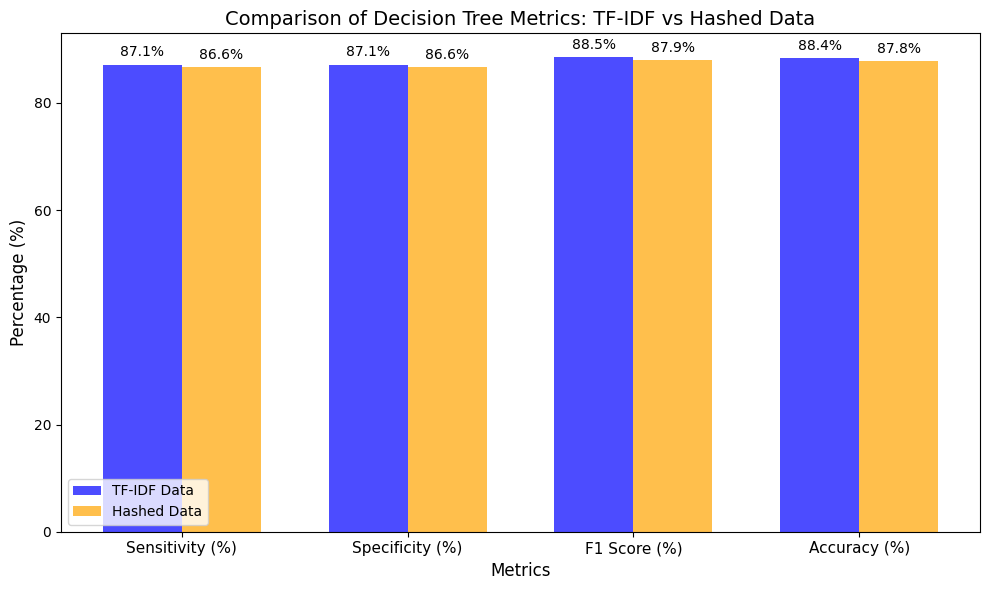

In [40]:

metrics_tfidf_dt = [sensitivity_dt, specificity_dt, f1_dt, DTscore]
metrics_hashing_dt = [sensitivity_dt_h, specificity_dt_h, f1_dt_h, DTscore_h]
metric_labels = ['Sensitivity (%)', 'Specificity (%)', 'F1 Score (%)', 'Accuracy (%)']

# Convert metrics to percentages
metrics_tfidf_dt = [metric * 100 for metric in metrics_tfidf_dt]
metrics_hashing_dt = [metric * 100 for metric in metrics_hashing_dt]

x = np.arange(len(metric_labels))  # X-axis positions
width = 0.35  
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for TF-IDF and Hashing Decision Tree
bars1 = ax.bar(x - width/2, metrics_tfidf_dt, width, label='TF-IDF Data', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, metrics_hashing_dt, width, label='Hashed Data', color='orange', alpha=0.7)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Comparison of Decision Tree Metrics: TF-IDF vs Hashed Data', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metric_labels, fontsize=11)
ax.legend()
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
add_bar_labels(bars1)
add_bar_labels(bars2)
plt.tight_layout()
plt.show()


In [41]:
# Train and Evaluate Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(tfidf_train, y_train)
y_pred_rf = random_forest.predict(tfidf_test)
RFcm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(RFcm)
RFscore = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: {:.3f}%".format(RFscore * 100))
sensitivity_rf = recall_score(y_test, y_pred_rf, pos_label=0) 
print("Sensitivity (Recall): {:.3f}%".format(sensitivity_rf * 100))
specificity_rf = RFcm[0, 0] / (RFcm[0, 0] + RFcm[0, 1])  # TN / (TN + FP)
print("Specificity: {:.3f}%".format(specificity_rf * 100))
f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score: {:.3f}%".format(f1_rf * 100))

Confusion Matrix:
[[2935  181]
 [ 371 2753]]
Random Forest Accuracy: 91.154%
Sensitivity (Recall): 94.191%
Specificity: 94.191%
F1 Score: 90.888%


In [42]:

random_forest_h = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_h.fit(hashing_train, y_train)
y_pred_rf_h = random_forest_h.predict(hashing_test)
RFcm_h = confusion_matrix(y_test, y_pred_rf_h)
print("Confusion Matrix (Hashing):")
print(RFcm_h)
RFscore_h = accuracy_score(y_test, y_pred_rf_h)
print("Random Forest Accuracy (Hashing): {:.3f}%".format(RFscore_h * 100))
sensitivity_rf_h = recall_score(y_test, y_pred_rf_h, pos_label=0) 
print("Sensitivity (Recall) (Hashing): {:.3f}%".format(sensitivity_rf_h * 100))
specificity_rf_h = RFcm_h[0, 0] / (RFcm_h[0, 0] + RFcm_h[0, 1])  # TN / (TN + FP)
print("Specificity (Hashing): {:.3f}%".format(specificity_rf_h * 100))
f1_rf_h = f1_score(y_test, y_pred_rf_h)
print("F1 Score (Hashing): {:.3f}%".format(f1_rf_h * 100))


Confusion Matrix (Hashing):
[[2931  185]
 [ 381 2743]]
Random Forest Accuracy (Hashing): 90.929%
Sensitivity (Recall) (Hashing): 94.063%
Specificity (Hashing): 94.063%
F1 Score (Hashing): 90.648%


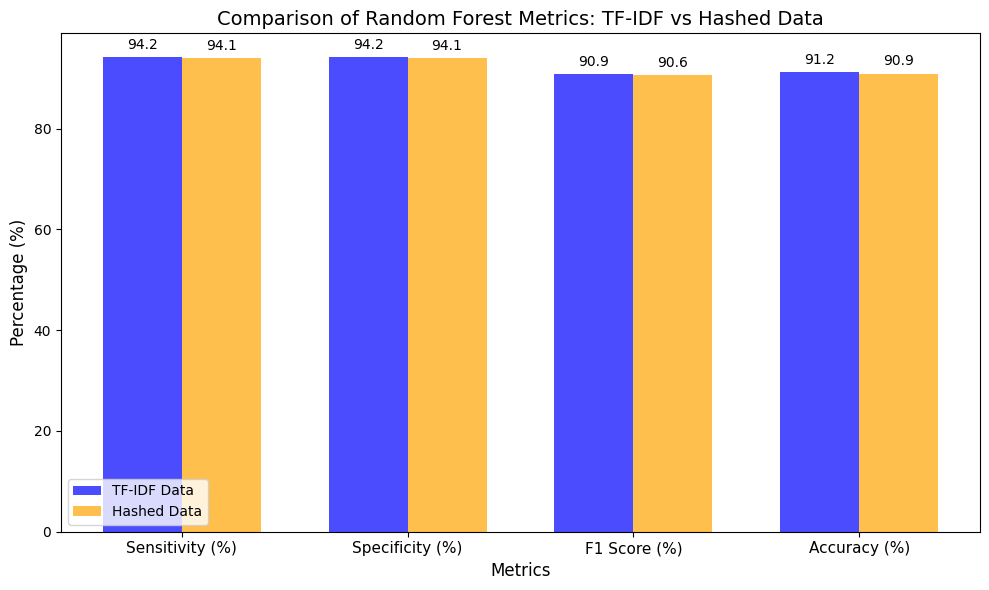

In [43]:

metrics_tfidf_rf = [sensitivity_rf, specificity_rf, f1_rf, RFscore]
metrics_hashing_rf = [sensitivity_rf_h, specificity_rf_h, f1_rf_h, RFscore_h]
metric_labels = ['Sensitivity (%)', 'Specificity (%)', 'F1 Score (%)', 'Accuracy (%)']
metrics_tfidf_rf = [metric * 100 for metric in metrics_tfidf_rf]
metrics_hashing_rf = [metric * 100 for metric in metrics_hashing_rf]
x = np.arange(len(metric_labels))  # X-axis positions
width = 0.35  # Width of bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, metrics_tfidf_rf, width, label='TF-IDF Data', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, metrics_hashing_rf, width, label='Hashed Data', color='orange', alpha=0.7)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Comparison of Random Forest Metrics: TF-IDF vs Hashed Data', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metric_labels, fontsize=11)
ax.legend()
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

add_bar_labels(bars1)
add_bar_labels(bars2)

plt.tight_layout()
plt.show()


In [44]:
# Train and Evaluate SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(tfidf_train, y_train)
y_pred_svm = svm_model.predict(tfidf_test)
SVCcm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(SVCcm)
SVscore = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy: {:.3f}%".format(SVscore * 100))
sensitivity_svm = recall_score(y_test, y_pred_svm, pos_label=0) 
print("Sensitivity (Recall): {:.3f}%".format(sensitivity_svm * 100))
specificity_svm = SVCcm[0, 0] / (SVCcm[0, 0] + SVCcm[0, 1])  # TN / (TN + FP)
print("Specificity: {:.3f}%".format(specificity_svm * 100))
f1_svm = f1_score(y_test, y_pred_svm)
print("F1 Score: {:.3f}%".format(f1_svm * 100))

Confusion Matrix:
[[2973  143]
 [ 138 2986]]
SVM Accuracy: 95.497%
Sensitivity (Recall): 95.411%
Specificity: 95.411%
F1 Score: 95.506%


In [45]:
from sklearn.svm import SVC
svm_model_h = SVC(kernel='linear', random_state=42, probability=True)
svm_model_h.fit(hashing_train, y_train)
y_pred_svm_h = svm_model_h.predict(hashing_test)
SVCcm_h = confusion_matrix(y_test, y_pred_svm_h)
print("Confusion Matrix (Hashing):")
print(SVCcm_h)
SVscore_h = accuracy_score(y_test, y_pred_svm_h)
print("Accuracy: {:.3f}%".format(SVscore_h * 100))
sensitivity_svm_h = recall_score(y_test, y_pred_svm_h, pos_label=0)
print("Sensitivity (Recall): {:.3f}%".format(sensitivity_svm_h * 100))
specificity_svm_h = SVCcm_h[0, 0] / (SVCcm_h[0, 0] + SVCcm_h[0, 1])  # TN / (TN + FP)
print("Specificity: {:.3f}%".format(specificity_svm_h * 100))
f1_svm_h = f1_score(y_test, y_pred_svm_h)
print("F1 Score: {:.3f}%".format(f1_svm_h * 100))


Confusion Matrix (Hashing):
[[2928  188]
 [ 159 2965]]
Accuracy: 94.439%
Sensitivity (Recall): 93.967%
Specificity: 93.967%
F1 Score: 94.472%


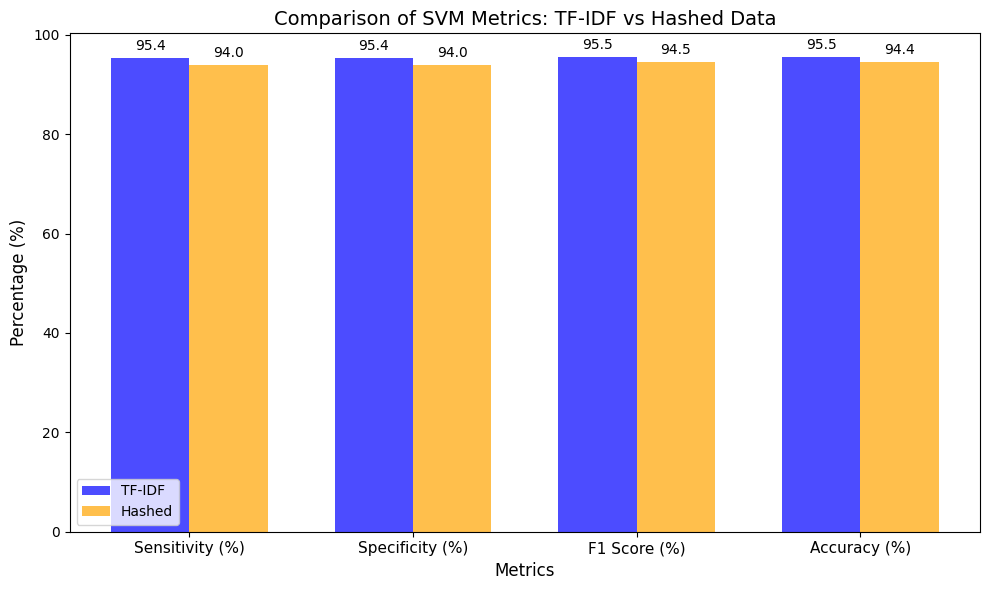

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define metrics for TF-IDF and Hashing SVM
metrics_tfidf_svm = [sensitivity_svm, specificity_svm, f1_svm, SVscore]
metrics_hashing_svm = [sensitivity_svm_h, specificity_svm_h, f1_svm_h, SVscore_h]
metric_labels = ['Sensitivity (%)', 'Specificity (%)', 'F1 Score (%)', 'Accuracy (%)']

# Multiply metrics by 100 for percentage representation
metrics_tfidf_svm = [metric * 100 for metric in metrics_tfidf_svm]
metrics_hashing_svm = [metric * 100 for metric in metrics_hashing_svm]

# X-axis positions
x = np.arange(len(metric_labels))
width = 0.35  # Width of bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, metrics_tfidf_svm, width, label='TF-IDF', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, metrics_hashing_svm, width, label='Hashed', color='orange', alpha=0.7)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Comparison of SVM Metrics: TF-IDF vs Hashed Data', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metric_labels, fontsize=11)
ax.legend()
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=10)
add_bar_labels(bars1)
add_bar_labels(bars2)
plt.tight_layout()
plt.show()

In [47]:
accuracy_values = [MNBscore, LRscore, KNNscore, DTscore, RFscore, SVscore]
sensitivity_values = [sensitivity_mnb, sensitivity_lr, sensitivity_knn, sensitivity_dt, sensitivity_rf, sensitivity_svm]
specificity_values = [specificity_mnb, specificity_lr, specificity_knn, specificity_dt, specificity_rf, specificity_svm]
f1_values = [f1_mnb, f1_lr, f1_knn, f1_dt, f1_rf, f1_svm]

accuracy_values_h = [MNBscore_h, LRscore_h, KNNscore_h, DTscore_h, RFscore_h, SVscore_h]
sensitivity_values_h = [sensitivity_mnb_h, sensitivity_lr_h, sensitivity_knn_h, sensitivity_dt_h, sensitivity_rf_h, sensitivity_svm_h]
specificity_values_h = [specificity_mnb_h, specificity_lr_h, specificity_knn_h, specificity_dt_h, specificity_rf_h, specificity_svm_h]
f1_values_h = [f1_mnb_h, f1_lr_h, f1_knn_h, f1_dt_h, f1_rf_h, f1_svm_h]

accuracy_values = [val * 100 for val in accuracy_values]
sensitivity_values = [val * 100 for val in sensitivity_values]
specificity_values = [val * 100 for val in specificity_values]
f1_values = [val * 100 for val in f1_values]

accuracy_values_h = [val * 100 for val in accuracy_values_h]
sensitivity_values_h = [val * 100 for val in sensitivity_values_h]
specificity_values_h = [val * 100 for val in specificity_values_h]
f1_values_h = [val * 100 for val in f1_values_h]
# Data including the new columns for sensitivity, specificity, and F1 score
data_h = [
    [1, "MultinomialNB", accuracy_values[0], sensitivity_values[0], specificity_values[0], f1_values[0], accuracy_values_h[0], sensitivity_values_h[0], specificity_values_h[0], f1_values_h[0]],
    [2, "LogisticRegression", accuracy_values[1], sensitivity_values[1], specificity_values[1], f1_values[1], accuracy_values_h[1], sensitivity_values_h[1], specificity_values_h[1], f1_values_h[1]],
    [3, "KNeighborsClassifier", accuracy_values[2], sensitivity_values[2], specificity_values[2], f1_values[2], accuracy_values_h[2], sensitivity_values_h[2], specificity_values_h[2], f1_values_h[2]],
    [4, "DecisionTreeClassifier", accuracy_values[3], sensitivity_values[3], specificity_values[3], f1_values[3], accuracy_values_h[3], sensitivity_values_h[3], specificity_values_h[3], f1_values_h[3]],
    [5, "RandomForestClassifier", accuracy_values[4], sensitivity_values[4], specificity_values[4], f1_values[4], accuracy_values_h[4], sensitivity_values_h[4], specificity_values_h[4], f1_values_h[4]],
    [6, "SupportVectorMachine(SVM)", accuracy_values[5], sensitivity_values[5], specificity_values[5], f1_values[5], accuracy_values_h[5], sensitivity_values_h[5], specificity_values_h[5], f1_values_h[5]]
]

headers = [
    "S.no.", "Classifier", 
    "Accuracy (%) (tf-idf)", "Sensitivity (%) (tf-idf)", "Specificity (%) (tf-idf)", "F1 Score (%) (tf-idf)",
    "Accuracy (%) (hashing)", "Sensitivity (%) (hashing)", "Specificity (%) (hashing)", "F1 Score (%) (hashing)"
]

# Creating DataFrame
results_h = pd.DataFrame(data_h, columns=headers)
results_h.set_index("S.no.", inplace=True)
results_h


,Classifier,Accuracy (%) (tf-idf),Sensitivity (%) (tf-idf),Specificity (%) (tf-idf),F1 Score (%) (tf-idf),Accuracy (%) (hashing),Sensitivity (%) (hashing),Specificity (%) (hashing),F1 Score (%) (hashing)
S.no.,,,,,,,,,
1,MultinomialNB,84.679487,99.358151,99.358151,82.070518,82.788462,99.293967,99.293967,79.417401
2,LogisticRegression,93.685897,92.554557,92.554557,93.763849,92.884615,91.623877,91.623877,92.981347
3,KNeighborsClassifier,86.250000,92.297818,92.297818,85.383305,61.955128,24.775353,24.775353,72.272833
4,DecisionTreeClassifier,88.381410,87.130937,87.130937,88.537549,87.756410,86.649551,86.649551,87.903737
5,RandomForestClassifier,91.153846,94.191271,94.191271,90.888082,90.929487,94.062901,94.062901,90.647720
6,SupportVectorMachine(SVM),95.496795,95.410783,95.410783,95.506157,94.439103,93.966624,93.966624,94.471881


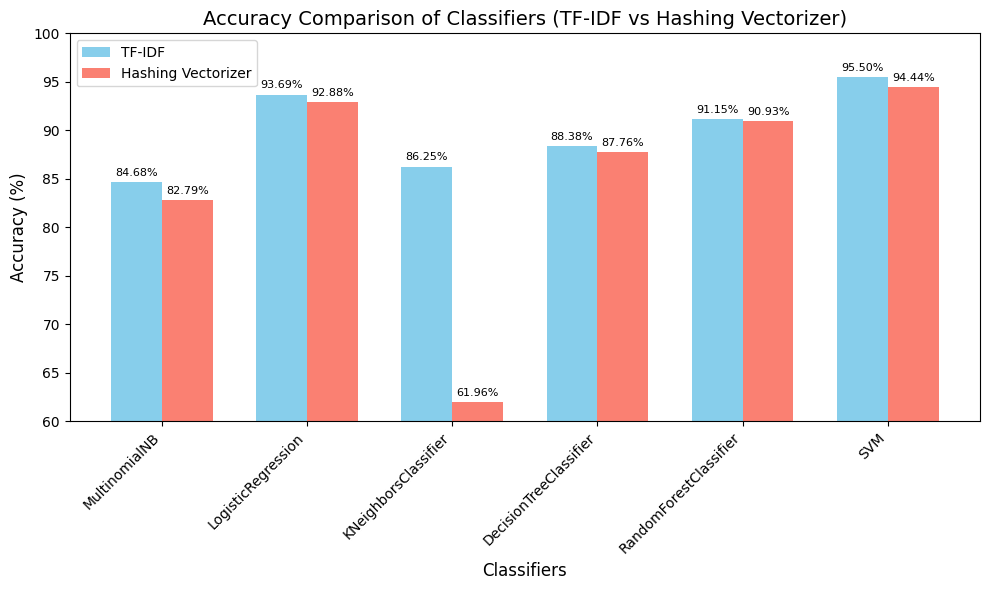

In [48]:
import numpy as np
import matplotlib.pyplot as plt

models = ["MultinomialNB", "LogisticRegression", "KNeighborsClassifier", 
          "DecisionTreeClassifier", "RandomForestClassifier", "SVM"]

accuracy_tfidf = accuracy_values  # Accuracy values for TF-IDF
accuracy_hashing = accuracy_values_h  # Accuracy values for Hashing Vectorizer

# Filter out accuracy values less than 60
filtered_models = [model for i, model in enumerate(models) if accuracy_tfidf[i] >= 60 and accuracy_hashing[i] >= 60]
filtered_accuracy_tfidf = [acc for i, acc in enumerate(accuracy_tfidf) if acc >= 60 and accuracy_hashing[i] >= 60]
filtered_accuracy_hashing = [acc for i, acc in enumerate(accuracy_hashing) if acc >= 60 and accuracy_tfidf[i] >= 60]

# Setting the positions for the bars
x = np.arange(len(filtered_models))
width = 0.35  # Width of the bars

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, filtered_accuracy_tfidf, width, label="TF-IDF", color='skyblue')
bar2 = ax.bar(x + width/2, filtered_accuracy_hashing, width, label="Hashing Vectorizer", color='salmon')

# Adding labels, title, and legend
ax.set_xlabel("Classifiers", fontsize=12)
ax.set_ylabel("Accuracy (%)", fontsize=12)
ax.set_title("Accuracy Comparison of Classifiers (TF-IDF vs Hashing Vectorizer)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(filtered_models, rotation=45, ha="right", fontsize=10)
ax.legend(loc="best", fontsize=10)

# Set the y-axis limit from 60 to 100
ax.set_ylim(60, 100)

# Adding value labels to each bar
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Adjusting layout for better display
plt.tight_layout()
plt.show()



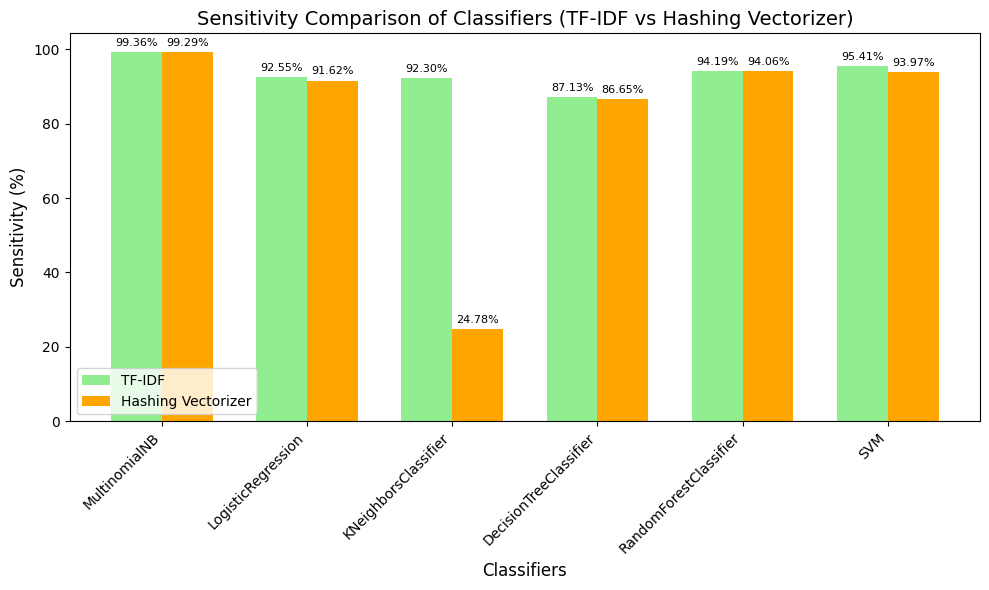

In [49]:
# Extracting data for plotting
sensitivity_tfidf = sensitivity_values  # Sensitivity values for TF-IDF
sensitivity_hashing = sensitivity_values_h  # Sensitivity values for Hashing Vectorizer

# Setting the positions for the bars
x = np.arange(len(models))
width = 0.35  # Width of the bars

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, sensitivity_tfidf, width, label="TF-IDF", color='lightgreen')
bar2 = ax.bar(x + width/2, sensitivity_hashing, width, label="Hashing Vectorizer", color='orange')

# Adding labels, title, and legend
ax.set_xlabel("Classifiers", fontsize=12)
ax.set_ylabel("Sensitivity (%)", fontsize=12)
ax.set_title("Sensitivity Comparison of Classifiers (TF-IDF vs Hashing Vectorizer)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.legend(loc="best", fontsize=10)

# Adding value labels to each bar
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Adjusting layout for better display
plt.tight_layout()
plt.show()


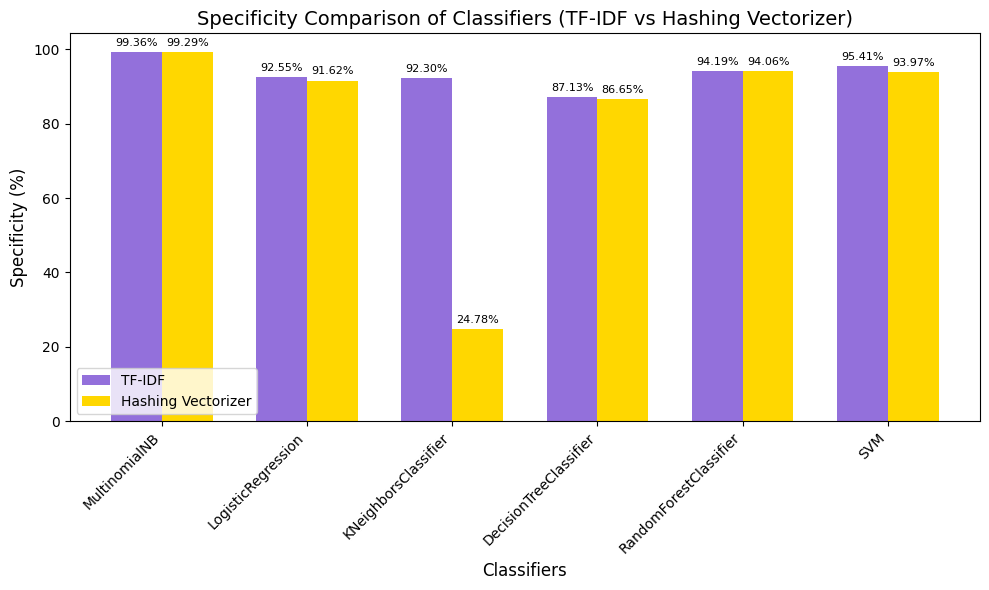

In [50]:
# Extracting data for plotting
specificity_tfidf = specificity_values  # Specificity values for TF-IDF
specificity_hashing = specificity_values_h  # Specificity values for Hashing Vectorizer

# Setting the positions for the bars
x = np.arange(len(models))
width = 0.35  # Width of the bars

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, specificity_tfidf, width, label="TF-IDF", color='mediumpurple')
bar2 = ax.bar(x + width/2, specificity_hashing, width, label="Hashing Vectorizer", color='gold')

# Adding labels, title, and legend
ax.set_xlabel("Classifiers", fontsize=12)
ax.set_ylabel("Specificity (%)", fontsize=12)
ax.set_title("Specificity Comparison of Classifiers (TF-IDF vs Hashing Vectorizer)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.legend(loc="best", fontsize=10)

# Adding value labels to each bar
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Adjusting layout for better display
plt.tight_layout()
plt.show()


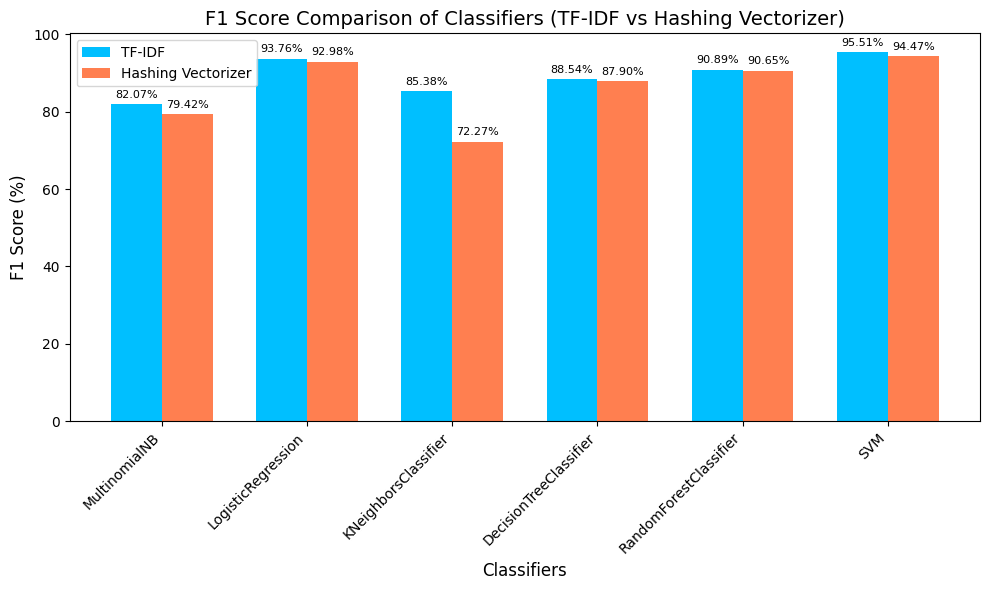

In [51]:
# Extracting data for plotting
f1_tfidf = f1_values  # F1-score values for TF-IDF
f1_hashing = f1_values_h  # F1-score values for Hashing Vectorizer

# Setting the positions for the bars
x = np.arange(len(models))
width = 0.35  # Width of the bars

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, f1_tfidf, width, label="TF-IDF", color='deepskyblue')
bar2 = ax.bar(x + width/2, f1_hashing, width, label="Hashing Vectorizer", color='coral')

# Adding labels, title, and legend
ax.set_xlabel("Classifiers", fontsize=12)
ax.set_ylabel("F1 Score (%)", fontsize=12)
ax.set_title("F1 Score Comparison of Classifiers (TF-IDF vs Hashing Vectorizer)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.legend(loc="best", fontsize=10)

# Adding value labels to each bar
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Adjusting layout for better display
plt.tight_layout()
plt.show()


In [52]:
import pickle
model_filename = 'svm_model.pickle'
vectorizer_filename = 'tfidf_vectorizer.pickle'
pickle.dump(svm_model, open(model_filename, 'wb'))
pickle.dump(tfidf_vectorizer, open(vectorizer_filename, 'wb'))

In [53]:
model_filename = 'MNB.pickle'
pickle.dump(MNB, open(model_filename, 'wb'))

In [54]:
model_filename = 'KNN.pickle'
pickle.dump(KNN, open(model_filename, 'wb'))

In [55]:
model_filename = 'LR.pickle'
pickle.dump(LR, open(model_filename, 'wb'))

In [56]:
model_filename = 'decision_tree.pickle'
pickle.dump(decision_tree, open(model_filename, 'wb'))

In [57]:
model_filename = 'random_forest.pickle'
pickle.dump(random_forest, open(model_filename, 'wb'))

In [58]:
vectorizer_filename = 'hashing_vectorizer.pickle'
pickle.dump(hashing_vectorizer, open(vectorizer_filename, 'wb'))


In [59]:
model_filename = 'MNB_h.pickle'
pickle.dump(decision_tree, open(model_filename, 'wb'))

In [60]:
model_filename = 'KNN_h.pickle'
pickle.dump(KNN, open(model_filename, 'wb'))

In [61]:
model_filename = 'random_forest_h.pickle'
pickle.dump(random_forest, open(model_filename, 'wb'))

In [62]:
model_filename = 'decision_tree_h.pickle'
pickle.dump(decision_tree, open(model_filename, 'wb'))

In [63]:
model_filename = 'LR_h.pickle'
pickle.dump(LR, open(model_filename, 'wb'))

In [64]:
model_filename = 'svm_model_h.pickle'
pickle.dump(LR, open(model_filename, 'wb'))

In [65]:
import pickle
import math
import requests
from bs4 import BeautifulSoup
import re
import string

# List of models and their respective vectorizers
models_and_vectorizers = [
    ("svm_model.pickle", "tfidf_vectorizer.pickle"),
    ("LR.pickle", "tfidf_vectorizer.pickle"),
    ("random_forest.pickle", "tfidf_vectorizer.pickle"),
    ("decision_tree.pickle", "tfidf_vectorizer.pickle"),
    ("KNN.pickle", "tfidf_vectorizer.pickle"),
    ("MNB.pickle", "tfidf_vectorizer.pickle"),
    ("svm_model_h.pickle", "hashing_vectorizer.pickle"),
    ("LR_h.pickle", "hashing_vectorizer.pickle"),
    ("random_forest_h.pickle", "hashing_vectorizer.pickle"),
    ("decision_tree_h.pickle", "hashing_vectorizer.pickle"),
    ("KNN_h.pickle", "hashing_vectorizer.pickle"),
    ("MNB_h.pickle", "hashing_vectorizer.pickle")
]

# Function to clean and preprocess text
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'\W', ' ', text)     # Replace non-word characters with spaces
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)      # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing digits
    return text

# Function to scrape content from a URL
def scrape_content(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = soup.get_text()
    return text

# Input link from the user
link = input("Enter URL: ")
scraped_text = scrape_content(link)

# Clean and preprocess the scraped text
cleaned_text = wordopt(scraped_text)

# Loop through models and make predictions
for model_filename, vectorizer_filename in models_and_vectorizers:
    # Load the model and vectorizer
    model = pickle.load(open(model_filename, 'rb'))
    vectorizer = pickle.load(open(vectorizer_filename, 'rb'))
    
    # Transform the cleaned text using the loaded vectorizer
    tfidf_x = vectorizer.transform([cleaned_text])
    
    # Check that the model and vectorizer match
    print(f"\nUsing {model_filename.split('_')[0].upper()}:")
    if hasattr(model, "predict_proba"):
        try:
            pred_prob = model.predict_proba(tfidf_x)[0][1]  # Probability for class 1
            result = math.ceil(pred_prob * 100)  # Convert to percentage
            print(f"Prediction: {result}% True.")
        except ValueError as e:
            print(f"Error in predicting with {model_filename}: {e}")
    else:
        pred = model.predict(tfidf_x)
        print(f"Prediction: {pred[0]}")


Enter URL:  https://www.livemint.com/market/stock-market-news/stock-market-holidays-is-indian-stock-market-closed-tomorrow-for-maharashtra-assembly-election-2024-11732002057223.html



Using SVM:
Prediction: 100% True.

Using LR.PICKLE:
Prediction: 100% True.

Using RANDOM:
Prediction: 70% True.

Using DECISION:
Prediction: 0% True.

Using KNN.PICKLE:
Prediction: 77% True.

Using MNB.PICKLE:
Prediction: 77% True.

Using SVM:
Prediction: 83% True.

Using LR:
Prediction: 83% True.

Using RANDOM:
Prediction: 98% True.

Using DECISION:
Prediction: 100% True.

Using KNN:
Prediction: 45% True.

Using MNB:
Prediction: 100% True.
